In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [3]:
soundfile='/home/julia/workspace/hubbub/MRI_2.wav'

In [4]:
sampling_rate, data = wavfile.read(soundfile)

/usr/lib/python2.7/dist-packages/scipy/io/wavfile.py:172: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [5]:
print sampling_rate
print data.shape
corr=stats.pearsonr(data[:,0], data[:,1])
print corr

44100
(526656, 2)
(-0.19429466390313116, 0.0)


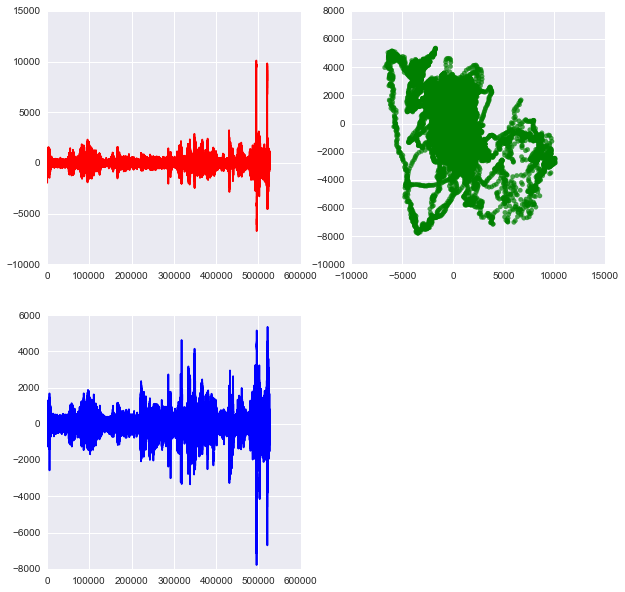

In [30]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
plot(data[:,0], color='red')
ax2 = fig.add_subplot(2,2,3)
plot(data[:,1], color='blue')
ax3=fig.add_subplot(2,2,2)
scatter(data[:,0], data[:,1], marker='o', color='green', alpha=0.7)

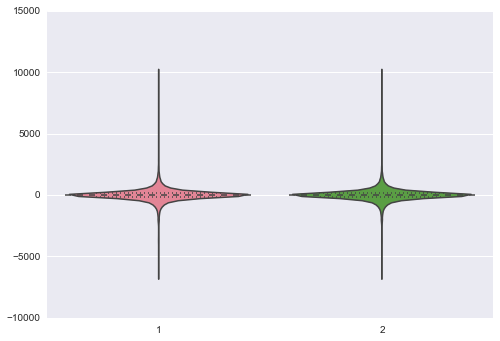

In [16]:
sns.violinplot([np.array(data[:,0]),np.array(data[:,0])], color=sns.color_palette("husl", 3))

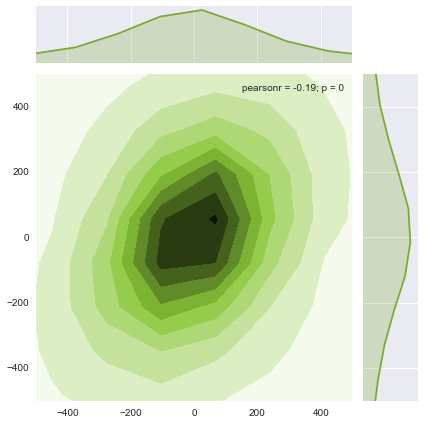

In [32]:
sns.jointplot(data[:,0], data[:,1], kind='kde', color=(0.46810256823426105, 0.6699492535792404, 0.1928958739904499), #'#070B19',
              xlim=(-500,500), ylim=(-500,500),
              )

In [33]:
fourier_0 = np.fft.fft(data[:,0])

In [36]:
freq = np.fft.fftfreq(data[:,0].shape[-1])

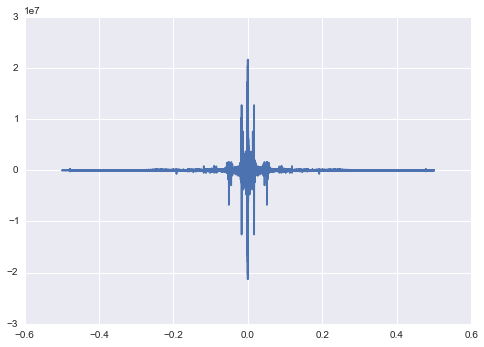

In [40]:
plot(fourier_0.real)

In [42]:
import nitime as nit

In [58]:
T_0 = nit.TimeSeries(data[:,0], sampling_interval=sampling_rate)

In [59]:
S0_original = nit.analysis.SpectralAnalyzer(T_0)

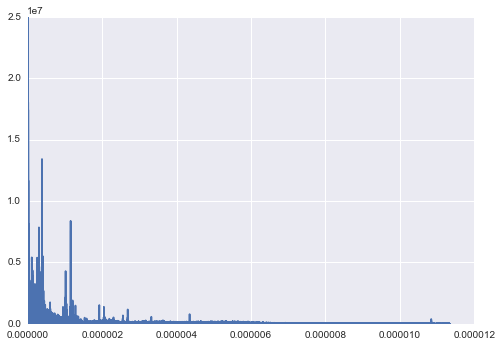

In [70]:
plot(S0_original.spectrum_fourier[0], np.abs(S0_original.spectrum_fourier[1]))